# **Tsunami Impact Analysis**

## Background of the Problem

Tsunamis are natural hazards that consist of a large, long wave, or series of waves that originate due to a displacement in the ocean.  Such displacements can be man-made or caused by earthquakes, landslides, volanic activity, and other forces.  Tsunamis, unlike waves that are driven by the wind, move between the surface of the ocean and the ocean floor, making them much more powerful and destructive.  When tsunamis approach land, the speed at which it travels and the volume of water it brings to shore can cause damage to human life, property, resources, and infrastructure, especially when there is little to no warning for people to prepare.

In my analysis, I will be exploring and identifying tsunami trends in terms of geographic location and the amount of damage left in their wake. 


## Research Questions to Explore

* *What forces most commonly cause tsunamis to occur?*

## Datasets

In my analysis, I will be using two datasets from [NOAA](www.noaa.gov) that contain tsunami event data.  
   * [Dataset1](https://www.ngdc.noaa.gov/hazel/view/hazards/tsunami/event-data): Event Data - This dataset contains recorded information on the source of the tsunami.  
   * [Dataset2](https://www.ngdc.noaa.gov/hazel/view/hazards/tsunami/runup-data): Runup Data - This dataset contains recorded information on locations where tsunami effects were seen.

## Data Manipulation and Transformation

### Importing libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('chained_assignment',None)

### Reading In and Condensing Dataset

In [12]:
df = pd.read_csv("data/tsunami-runups.tsv", sep='\t', low_memory=False)

## Condensing data so that we are only looking at definite tsunami events
## Definite tsunami events are marked by validity of 4
df = df[df['Tsunami Event Validity'] == 4]
df = df.drop(['More Info', 'Search Parameters'], axis=1)

In order to ensure data results are based on proven tsunami occurances, I've eliminated any data from questionable or probable tsunami occurrances.  Therefore, all of the analysis in this notebook will be based on definite tsunamis.

### Investigating Tsunami Damage

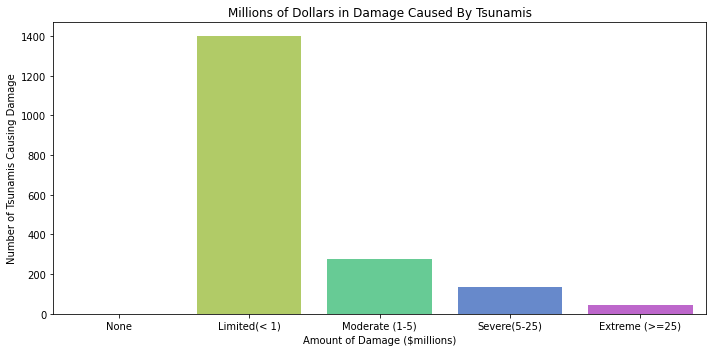

In [14]:
damage_df = df
map_replace = {0:'None',1:'Limited(< 1)', 2:'Moderate (1-5)',3:'Severe(5-25)', 4:'Extreme (>=25)'}
damage_order = ["None", "Limited(< 1)", "Moderate (1-5)", "Severe(5-25)", "Extreme (>=25)"]
damage_df = damage_df[pd.to_numeric(df['Damage Description'],errors='coerce').notna()]
damage_df['Damage Description'] = damage_df['Damage Description'].apply(lambda x: map_replace.get(x))


plt.figure(figsize=(10,5))
ax = sns.countplot(x='Damage Description', data = damage_df, palette = 'hls', order = damage_order)
plt.xlabel("Amount of Damage ($millions)")
plt.ylabel("Number of Tsunamis Causing Damage")
plt.title("Millions of Dollars in Damage Caused By Tsunamis")
plt.tight_layout()
plt.show()

NOAA categorized tsunami damage into the following categories: None, Limited, Moderate, Severe, and Extreme.  These categories represent both numerical data, and descriptions of damage when there was no numeral data available and instead, only descriptions of the damage.  Each category represents the approximate current dollar value of the millions of dollars in damages from the tsunamis.  <br>

Looking at the bar chart above, when tsunamis occur, they most frequently cause less than one million dollars in damage.  However, on occasion, an extremely powerful tsunami can cause extreme damage, costing those affected over twenty-five million dollars. <br>

Although the number of tsunamis causing extreme damage is limited, the cost is substantial.  Due to this, I will investigate if there are any similarities or trends in the tsunamis that cause the most amount of damage, whether it be geographic location, wave height, or wave indunation.



## Interpretation of Results

## Ethical Evaluation of Analysis

## Sources: